In [3]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from category_encoders import OrdinalEncoder

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Hitters.csv")

In [16]:
df=df.dropna()
df=df.reset_index()

In [8]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['index', 'Hits', 'Runs', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [9]:
df=df.drop(df[to_drop], axis=1)

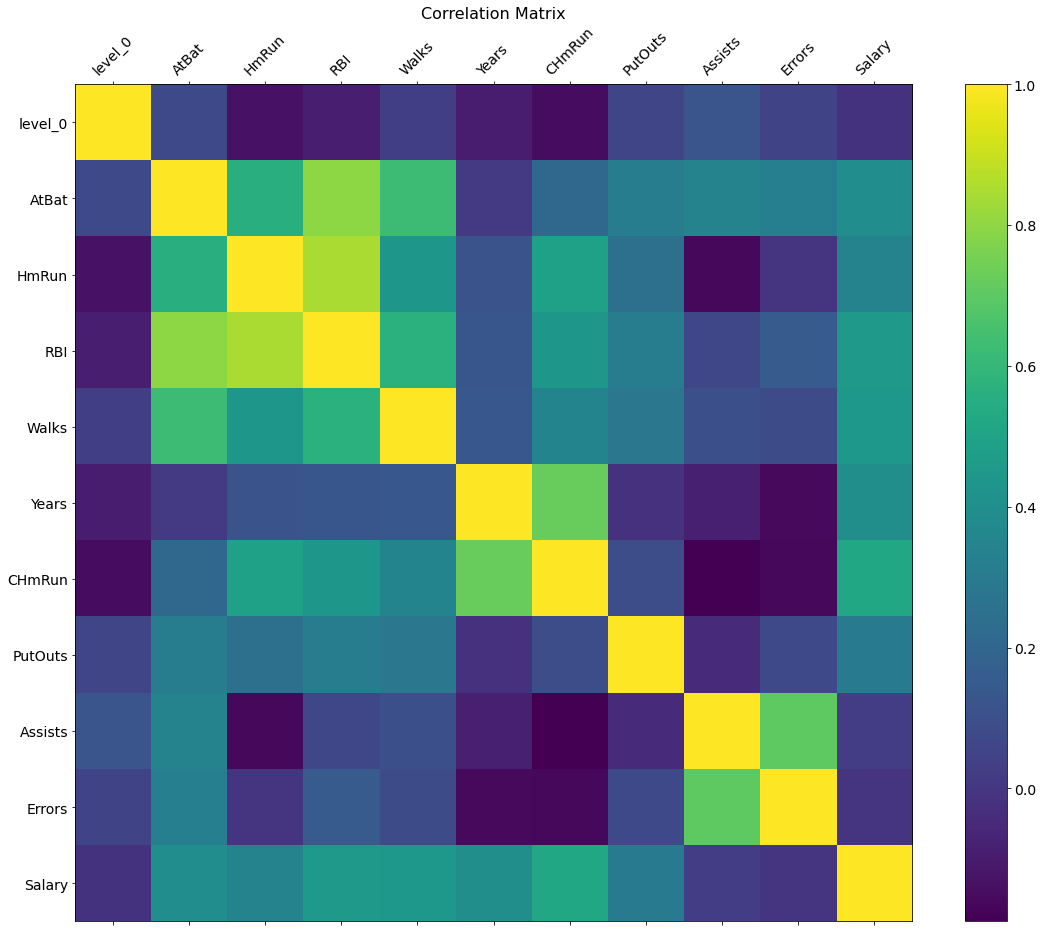

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [11]:
y=df["Salary"]
X=df.drop("Salary", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)
                                                    

In [12]:
alpha = [1e-20,1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2,0.1,0.2,0.3,0.5,0.8,0.9,1,2,5,10,20,50,100,200]
scoring="neg_mean_squared_error"
cv=50

### Ridge Regression

In [13]:
ridreg_cv = make_pipeline(OrdinalEncoder(),RidgeCV(alphas = alpha,scoring = scoring, cv = cv))
ridreg_cv.fit(X_train, y_train)
y_pred = ridreg_cv.predict(X_test)
df_ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
df_ridge_tuned_rmse

395.7723136229285

### Lasso Regression

In [14]:
lasso_cv = make_pipeline(OrdinalEncoder(),LassoCV(alphas = alpha, cv = cv))
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
df_lasso_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
df_lasso_tuned_rmse


395.7385057617991

In [15]:
print("Best alpha for Ridge riggression: ",ridreg_cv.named_steps["ridgecv"].alpha_,"Means Squared Error : ",df_ridge_tuned_rmse)
print("Best alpha for Lasso riggression: ",lasso_cv.named_steps["lassocv"].alpha_,"Means Squared Error : ",df_lasso_tuned_rmse)

Best alpha for Ridge riggression:  10.0 Means Squared Error :  395.7723136229285
Best alpha for Lasso riggression:  2.0 Means Squared Error :  395.7385057617991
